In [1]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as pl

In [2]:
#
# Load the data
#

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

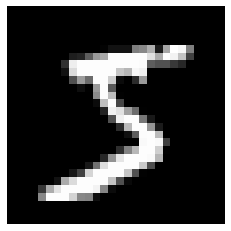

In [5]:
pl.imshow(x_train[0].reshape(28, 28), cmap='gray')
pl.axis('off');

In [6]:
#
# Build the encoder and decoder layers
#
encoder_layer = layers.Dense(32)
decoder_layer = layers.Dense(28*28)

In [15]:
#
# Build the end-to-end autoencoder model
#
autoencoder = keras.Sequential([
    layers.Input(shape=(28*28,)),
    encoder_layer,
    decoder_layer,
])
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
#
# Train the encoder and decoder together, so that they are "lossless"
#
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy())

In [12]:
autoencoder.fit(x_train, x_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1691
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1876
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2492
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2019
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1609
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1879
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1869
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1613
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1630
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1582


In [13]:
import my
from importlib import reload
reload(my);

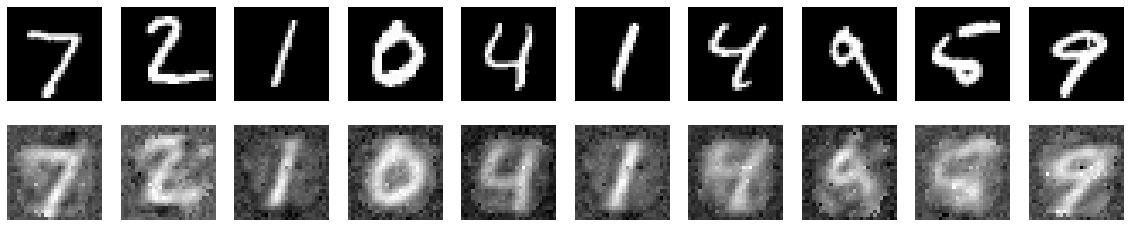

In [14]:
my.plot_reconstruction(autoencoder, x_test, 10)